In [4]:
import os
import sys
import urllib.request
import datetime
import time
import json
from config import *
import math
from pprint import pprint
import requests
from bs4 import BeautifulSoup

In [5]:
def get_request_url(url):
    
    req = urllib.request.Request(url)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

In [6]:
#[CODE 1]

def SanggaInfoService(pageNo,numOfRows,sigunguCd,bjdongCd):
    
    end_point = "http://api.suwon.go.kr/openapi-data/service/SanggaInfo/getHjdsearchInfo"
    
    parameters = "?pageNo=" + str(pageNo)
    parameters += "&numOfRows=" + str(numOfRows)
    parameters += "&sigunguCd=" + str(sigunguCd)
    parameters += "&bjdongCd=" + str(bjdongCd)
    parameters += "&ServiceKey=" + "TIyuV2FHFQSS46wIlsJNrwYGs9SqQEDOtNb0XZjVWp8k6pVUitI9BsXYzNGEYhUmLuovIzoeoIEA3fbXwqQwTg%3D%3D"
    
    global url
    
    url = end_point + parameters
    
    global retData
    
    retData = get_request_url(url)
    
    if (retData == None):
        return None
    else:
        return 

In [7]:
sigunguCd_suwon = [41111,41113,41115,41117]
sigungu_suwon = ['장안구','권선구','팔달구','영통구']

In [8]:
lat = []
lon = []

for i in sigunguCd_suwon :
    
    SanggaInfoService(1,3000,i,00000)

    soup = BeautifulSoup(retData, "html.parser")
    items = soup.find_all("item")
    
    for i in items :
        try:
            lat.append(float(i.lat.text))
            lon.append(float(i.lon.text))
        except:
            None

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme = "oceans16")
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

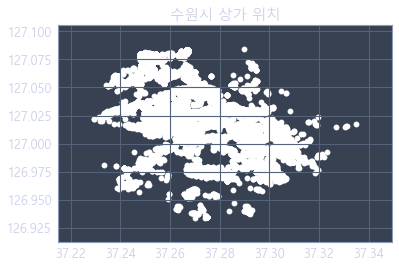

<Figure size 1440x1440 with 0 Axes>

In [24]:
plt.title("수원시 상가 위치")
plt.scatter(lat, lon, c = 'w')
plt.figure(figsize=(20,20))
plt.show()